In [2]:
#Librerias 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from datetime import datetime
import pandas as pd
from collections import Counter 

In [3]:
fecha=datetime.now().strftime("%m-%d-%Y_%H'%M'%S")
print(fecha)

01-24-2023_14'28'20


In [4]:
#funcion para abrir el csv
def open_csv(file):
    data=pd.read_csv(file)
    print(type(data))
    return data

In [5]:
#funcion de escritura del csv
def write_csv(df,name):
    fecha=str(datetime.now().strftime("%m-%d-%Y"))
    name=name+"_"+fecha
    name_csv="./"+name+".csv"
    df.to_csv(name_csv,header=True, index=True)   
    print("archivo csv guardado")
    return name

In [6]:
#funcion de escritura del pdf
def write_pdf(df,name):
    pdf_name=write_csv(df,name)
    name_pdf="./"+name_pdf+".pdf"
    plt.suptitle("Gráficas "+pdf_name, fontsize=14, fontweight='bold')
    name_pdf="./"+name+".pdf"   
    plt.savefig(namepdf,dpi=600, bbox_inches='tight')
    print("archivo pdf guardado")

In [9]:
#Cargar base de datos de csv
file="file/delivery_dataset.csv"
dt_report=open_csv(file)
dt_report.info()
dt_report

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   8999 non-null   int64  
 1   Month                  8999 non-null   int64  
 2   DayofMonth             8999 non-null   int64  
 3   DayOfWeek              8999 non-null   int64  
 4   Actual_Shipment_Time   8842 non-null   float64
 5   Planned_Shipment_Time  8999 non-null   int64  
 6   Planned_Delivery_Time  8999 non-null   int64  
 7   Carrier_Name           8999 non-null   object 
 8   Carrier_Num            8999 non-null   int64  
 9   Planned_TimeofTravel   8999 non-null   int64  
 10  Shipment_Delay         8842 non-null   float64
 11  Source                 8999 non-null   object 
 12  Destination            8999 non-null   object 
 13  Distance               8999 non-null   int64  
 14  Delivery_Status   

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2020,1,3,4,2003.0,1955,2225,WN,335,150,8.0,IAD,TPA,810,0.0
1,2020,1,3,4,754.0,735,1000,WN,3231,145,19.0,IAD,TPA,810,1.0
2,2020,1,3,4,628.0,620,750,WN,448,90,8.0,IND,BWI,515,0.0
3,2020,1,3,4,926.0,930,1100,WN,1746,90,-4.0,IND,BWI,515,0.0
4,2020,1,3,4,1829.0,1755,1925,WN,3920,90,34.0,IND,BWI,515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,2020,1,6,7,1928.0,1920,2020,WN,2611,120,8.0,BWI,BNA,588,0.0
8995,2020,1,6,7,927.0,925,1030,WN,127,65,2.0,BWI,BUF,281,0.0
8996,2020,1,6,7,1147.0,1145,1250,WN,903,65,2.0,BWI,BUF,281,0.0
8997,2020,1,6,7,1705.0,1655,1805,WN,1516,70,10.0,BWI,BUF,281,0.0


C:\Users\PC\AppData\Local\Temp/ipykernel_20848/976377070.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dt_report.hist(ax=ax)


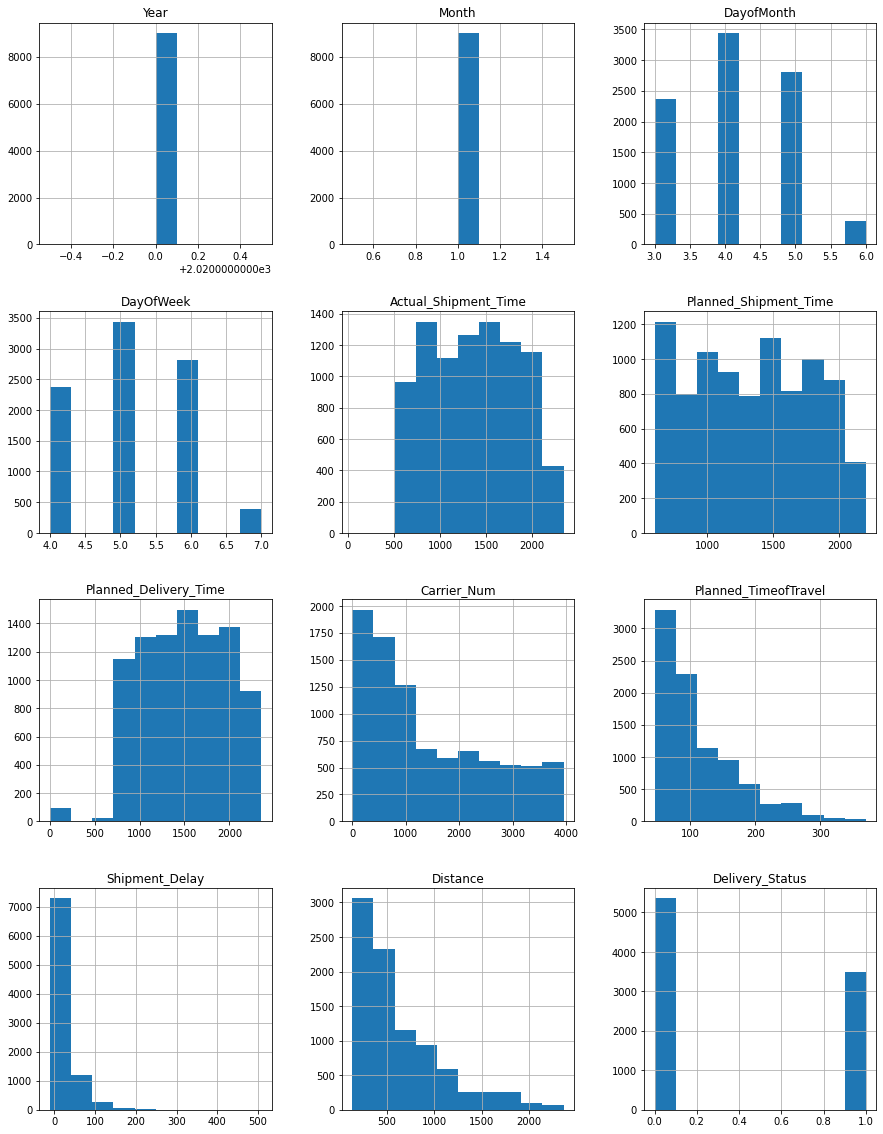

In [10]:
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
dt_report.hist(ax=ax)
plt.show()